# Natural Language Processing and Topic Modeling on User Review Dataset

# Part 1: Load Data & Exploration

In [1]:
!pip install -U -q PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [2]:
file = drive.CreateFile({'id':'1UIS6YrBoeIrg6i4qEhXrF-NEK0L3W42_'}) 
file.GetContentFile('data.tsv')  

In [3]:
import numpy as np
import pandas as pd
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [21]:
# Load data into dataframe
df = pd.read_csv('data.tsv', sep='\t', error_bad_lines=False) 

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 8704: expected 15 fields, saw 22\nSkipping line 16933: expected 15 fields, saw 22\nSkipping line 23726: expected 15 fields, saw 22\n'
b'Skipping line 85637: expected 15 fields, saw 22\n'
b'Skipping line 132136: expected 15 fields, saw 22\nSkipping line 158070: expected 15 fields, saw 22\nSkipping line 166007: expected 15 fields, saw 22\nSkipping line 171877: expected 15 fields, saw 22\nSkipping line 177756: expected 15 fields, saw 22\nSkipping line 181773: expected 15 fields, saw 22\nSkipping line 191085: expected 15 fields, saw 22\nSkipping line 196273: expected 15 fields, saw 22\nSkipping line 196331: expected 15 fields, saw 22\n'
b'Skipping line 197000: expected 15 fields, saw 22\nSkipping line 197011: expected 15 fields, saw 22\nSkip

In [6]:
df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,3653882,R3O9SGZBVQBV76,B00FALQ1ZC,937001370,"Invicta Women's 15150 ""Angel"" 18k Yellow Gold ...",Watches,5,0,0,N,Y,Five Stars,Absolutely love this watch! Get compliments al...,2015-08-31
1,US,14661224,RKH8BNC3L5DLF,B00D3RGO20,484010722,Kenneth Cole New York Women's KC4944 Automatic...,Watches,5,0,0,N,Y,I love thiswatch it keeps time wonderfully,I love this watch it keeps time wonderfully.,2015-08-31
2,US,27324930,R2HLE8WKZSU3NL,B00DKYC7TK,361166390,Ritche 22mm Black Stainless Steel Bracelet Wat...,Watches,2,1,1,N,Y,Two Stars,Scratches,2015-08-31
3,US,7211452,R31U3UH5AZ42LL,B000EQS1JW,958035625,Citizen Men's BM8180-03E Eco-Drive Stainless S...,Watches,5,0,0,N,Y,Five Stars,"It works well on me. However, I found cheaper ...",2015-08-31
4,US,12733322,R2SV659OUJ945Y,B00A6GFD7S,765328221,Orient ER27009B Men's Symphony Automatic Stain...,Watches,4,0,0,N,Y,"Beautiful face, but cheap sounding links",Beautiful watch face. The band looks nice all...,2015-08-31


In [22]:
# Cheching if there is any missing value
df.isnull().sum()

marketplace            0
customer_id            0
review_id              0
product_id             0
product_parent         0
product_title          2
product_category       0
star_rating            0
helpful_votes          0
total_votes            0
vine                   0
verified_purchase      0
review_headline        7
review_body          148
review_date            4
dtype: int64

In [23]:
# Remove missing value
df.dropna(subset=['review_body'],inplace=True)

In [24]:
df.reset_index(inplace=True, drop=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960056 entries, 0 to 960055
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   marketplace        960056 non-null  object
 1   customer_id        960056 non-null  int64 
 2   review_id          960056 non-null  object
 3   product_id         960056 non-null  object
 4   product_parent     960056 non-null  int64 
 5   product_title      960054 non-null  object
 6   product_category   960056 non-null  object
 7   star_rating        960056 non-null  int64 
 8   helpful_votes      960056 non-null  int64 
 9   total_votes        960056 non-null  int64 
 10  vine               960056 non-null  object
 11  verified_purchase  960056 non-null  object
 12  review_headline    960049 non-null  object
 13  review_body        960056 non-null  object
 14  review_date        960052 non-null  object
dtypes: int64(5), object(10)
memory usage: 109.9+ MB


In [26]:
# training data
# use the first 2000 data as our training data
data = df.loc[:1999, 'review_body'].tolist()

# Part 2: Tokenizing and Stemming

In [27]:
# Load stopwords and stemmer function from NLTK library.
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english') 
stopwords.append("'s") 
stopwords.append("'m")
stopwords.append("br") 
stopwords.append("watch") 

print ("We use " + str(len(stopwords)) + " stop-words from nltk library.")
print (stopwords[:10])

We use 183 stop-words from nltk library.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [28]:
# Use our defined functions to analyze (i.e. tokenize, stem) our reviews.
from nltk.stem.snowball import SnowballStemmer
# from nltk.stem import WordNetLemmatizer 
stemmer = SnowballStemmer("english")

# tokenization and stemming
def tokenization_and_stemming(text): 
    tokens = []   
    for word in nltk.word_tokenize(text):
        if word.lower() not in stopwords:
            tokens.append(word.lower())

    filtered_tokens = []
    
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if token.isalpha():
            filtered_tokens.append(token)
     
    # stemming
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

# Part 3: TF-IDF

In this part, I will use the TfidfVectorizer() from the sklearn library to create the tf-idf matrix.

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
# define vectorizer parameters
# max_df : maximum document frequency for the given word
# min_df : minimum document frequency for the given word
# max_features: maximum number of words
# use_idf: if not true, we only calculate tf
# stop_words : built-in stop words
# tokenizer: how to tokenize the document
# ngram_range: (min_value, max_value), eg. (1, 3) means the result will include 1-gram, 2-gram, 3-gram
tfidf_model = TfidfVectorizer(max_df=0.99, max_features=1000,
                                 min_df=0.01, stop_words='english',
                                 use_idf=True, tokenizer=tokenization_and_stemming, ngram_range=(1,1))

tfidf_matrix = tfidf_model.fit_transform(data) #fit the vectorizer to synopses

print ("In total, there are " + str(tfidf_matrix.shape[0]) + \
      " reviews and " + str(tfidf_matrix.shape[1]) + " terms.")

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['afterward', 'alon', 'alreadi', 'alway', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becom', 'besid', 'cri', 'describ', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'otherwis', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev'] not in stop_words.
  % sorted(inconsistent)


In total, there are 2000 reviews and 246 terms.


In [30]:
tfidf_matrix

<2000x246 sparse matrix of type '<class 'numpy.float64'>'
	with 14532 stored elements in Compressed Sparse Row format>

In [31]:
# Save the terms identified by TF-IDF. 
# words
tf_selected_words = tfidf_model.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [32]:
# print out words
tf_selected_words

['abl',
 'absolut',
 'accur',
 'actual',
 'add',
 'adjust',
 'alarm',
 'alreadi',
 'alway',
 'amaz',
 'amazon',
 'anoth',
 'appear',
 'arriv',
 'attract',
 'automat',
 'awesom',
 'bad',
 'band',
 'batteri',
 'beauti',
 'best',
 'better',
 'big',
 'bit',
 'black',
 'blue',
 'bought',
 'box',
 'brand',
 'break',
 'bright',
 'broke',
 'broken',
 'button',
 'buy',
 'ca',
 'came',
 'case',
 'casio',
 'chang',
 'cheap',
 'check',
 'clasp',
 'classi',
 'clear',
 'clock',
 'collect',
 'color',
 'come',
 'comfort',
 'compliment',
 'cool',
 'cost',
 'coupl',
 'crown',
 'crystal',
 'cute',
 'dark',
 'date',
 'daughter',
 'day',
 'deal',
 'definit',
 'deliveri',
 'design',
 'dial',
 'differ',
 'digit',
 'disappoint',
 'display',
 'dress',
 'durabl',
 'easi',
 'easili',
 'eleg',
 'end',
 'everi',
 'everyday',
 'everyth',
 'exact',
 'excel',
 'expect',
 'expens',
 'extrem',
 'face',
 'fact',
 'far',
 'fast',
 'featur',
 'feel',
 'fell',
 'figur',
 'fine',
 'finish',
 'fit',
 'function',
 'gift',
 'g

# Part 4: K-means clustering

In this part, I will perform the K-means algorithm to find out possible clusters in our reviews dataset.



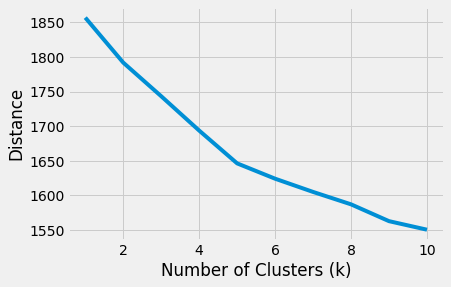

In [73]:
# Use Elbow Method to find the optimal number of clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.style as style

range_n_clusters = [1, 2, 3, 4, 5, 6,7,8,9,10]
avg_distance=[]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, random_state=42).fit(tfidf_matrix)
  avg_distance.append(clusterer.inertia_)

style.use("fivethirtyeight")
plt.plot(range_n_clusters, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

From the plot above, we can see that after 5, the downward trend is not that great as less than 5. So I decide to use 5 as the number of clusters in the kmeans.

In [74]:
# Analyze K-means Result

# k-means clustering
from sklearn.cluster import KMeans
num_clusters = 5
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf_matrix)
clusters = km.labels_.tolist()

# create DataFrame films from all of the input files.
product = { 'review': df[:2000].review_body, 'cluster': clusters}
frame = pd.DataFrame(product, columns = ['review', 'cluster'])

In [75]:
frame.head(10)

,review,cluster
0,Absolutely love this watch! Get compliments al...,2
1,I love this watch it keeps time wonderfully.,2
2,Scratches,4
3,"It works well on me. However, I found cheaper ...",4
4,Beautiful watch face. The band looks nice all...,4
5,"i love this watch for my purpose, about the pe...",4
6,"for my wife and she loved it, looks great and ...",3
7,I was about to buy this thinking it was a Swis...,4
8,Watch is perfect. Rugged with the metal &#34;B...,3
9,Great quality and build.<br />The motors are r...,4


In [76]:
print ("Number of reviews included in each cluster:")
frame['cluster'].value_counts().to_frame()

Number of reviews included in each cluster:


,cluster
4,1360
3,211
2,187
1,127
0,115


In [77]:
km.cluster_centers_

array([[0.        , 0.        , 0.        , ..., 0.        , 0.01031923,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00376753,
        0.        ],
       [0.        , 0.03322376, 0.        , ..., 0.00475463, 0.0103646 ,
        0.        ],
       [0.00159506, 0.        , 0.        , ..., 0.00244379, 0.00411129,
        0.01364689],
       [0.0063183 , 0.00411234, 0.00596161, ..., 0.00850217, 0.02161743,
        0.01531703]])

In [91]:
print ("<Document clustering result by K-means>")

#km.cluster_centers_ denotes the importances of each items in centroid.
#We need to sort it in decreasing-order and get the top k items.
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

Cluster_keywords_summary = {}
for i in range(num_clusters):
    print ("Cluster " + str(i) + " words:", end='')
    Cluster_keywords_summary[i] = []
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        Cluster_keywords_summary[i].append(tf_selected_words[ind])
        print (tf_selected_words[ind] + ",", end='')
    print ()
    
    cluster_reviews = frame[frame.cluster==i].review.tolist()
    print ("Cluster " + str(i) + " reviews (" + str(len(cluster_reviews)) + " ) ")
   

<Document clustering result by K-means>
Cluster 0 words:like,look,work,time,band,perfect,
Cluster 0 reviews (1355 ) 
Cluster 1 words:great,look,price,product,work,love,
Cluster 1 reviews (210 ) 
Cluster 2 words:nice,price,look,realli,love,good,
Cluster 2 reviews (130 ) 
Cluster 3 words:good,product,price,qualiti,work,look,
Cluster 3 reviews (115 ) 
Cluster 4 words:love,gift,wife,beauti,husband,absolut,
Cluster 4 reviews (190 ) 


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


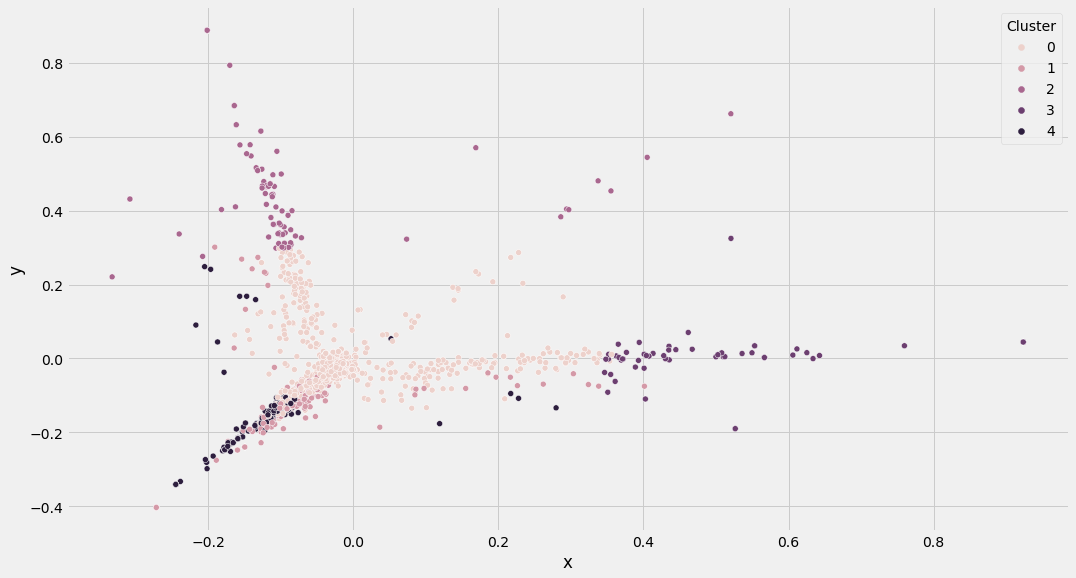

In [80]:
# Plot the kmeans result
from sklearn.decomposition import KernelPCA
import seaborn as sns
pca = KernelPCA(n_components=5)
tfidf_matrix_np=tfidf_matrix.toarray()
X = pca.fit_transform(tfidf_matrix)
xs, ys = X[:, 0], X[:,1]
pca_df = pd.DataFrame(dict(x = xs, y = ys, Cluster = clusters ))
plt.subplots(figsize=(16,9))
sns.scatterplot('x', 'y', data=pca_df, hue='Cluster')

From the plot above we can see that cluster 4 contains more negative reviews while cluster 2 contains more positive reviews. The reviews in cluster 0 are more neutral.

# Part 5: Topic Modeling - Latent Dirichlet Allocation

In [81]:
# Use LDA for clustering
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=5)

In [82]:
# document topic matrix for tfidf_matrix_lda
lda_output = lda.fit_transform(tfidf_matrix)
print(lda_output.shape)
print(lda_output)

(2000, 5)
[[0.06016845 0.06315322 0.75525572 0.0605     0.0609226 ]
 [0.08392769 0.2756248  0.47058867 0.08402914 0.0858297 ]
 [0.10000154 0.59998946 0.10000254 0.10000341 0.10000306]
 ...
 [0.06636473 0.0653068  0.06491558 0.06481856 0.73859434]
 [0.59734106 0.10091667 0.10001208 0.10000201 0.10172818]
 [0.2        0.2        0.2        0.2        0.2       ]]


In [83]:
# topics and words matrix
topic_word = lda.components_
print(topic_word.shape)
print(topic_word)

(5, 246)
[[ 6.67821606  0.20746657  1.41584962 ...  1.13228006 27.90607286
   3.02529073]
 [ 0.20390156  0.20591244  4.05912432 ...  0.40371772  4.82565729
  21.07763353]
 [ 0.20018547 11.98702769  0.20110091 ...  0.20148582  0.20263019
   0.20079397]
 [ 2.64685549  0.2041233   3.23076245 ... 12.02997983  0.20309392
   0.20526804]
 [ 0.20028809  0.20109837  0.20094778 ...  0.20024781  1.73310359
   0.20166721]]


In [84]:
# column names
topic_names = ["Topic" + str(i) for i in range(lda.n_components)]

# index names
doc_names = ["Doc" + str(i) for i in range(len(data))]

df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topic_names, index=doc_names)

# get dominant topic for each document
topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['topic'] = topic

df_document_topic.head(10)

,Topic0,Topic1,Topic2,Topic3,Topic4,topic
Doc0,0.06,0.06,0.76,0.06,0.06,2
Doc1,0.08,0.28,0.47,0.08,0.09,2
Doc2,0.10,0.60,0.10,0.10,0.10,1
Doc3,0.06,0.06,0.06,0.06,0.76,4
Doc4,0.33,0.29,0.04,0.04,0.30,0
Doc5,0.55,0.08,0.22,0.08,0.08,0
Doc6,0.06,0.06,0.74,0.06,0.06,2
Doc7,0.22,0.59,0.06,0.06,0.06,1
Doc8,0.69,0.05,0.17,0.05,0.05,0
Doc9,0.06,0.06,0.06,0.06,0.77,4


In [86]:
df_document_topic['topic'].value_counts().to_frame()

,topic
0,616
1,436
2,428
4,293
3,227


In [87]:
print(lda.components_)
df_topic_words = pd.DataFrame(lda.components_)
df_topic_words.columns = tfidf_model.get_feature_names()
df_topic_words.index = topic_names
df_topic_words.head()

[[ 6.67821606  0.20746657  1.41584962 ...  1.13228006 27.90607286
   3.02529073]
 [ 0.20390156  0.20591244  4.05912432 ...  0.40371772  4.82565729
  21.07763353]
 [ 0.20018547 11.98702769  0.20110091 ...  0.20148582  0.20263019
   0.20079397]
 [ 2.64685549  0.2041233   3.23076245 ... 12.02997983  0.20309392
   0.20526804]
 [ 0.20028809  0.20109837  0.20094778 ...  0.20024781  1.73310359
   0.20166721]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abl,absolut,accur,actual,add,adjust,alarm,alreadi,alway,amaz,amazon,anoth,appear,arriv,attract,automat,awesom,bad,band,batteri,beauti,best,better,big,bit,black,blue,bought,box,brand,break,bright,broke,broken,button,buy,ca,came,case,casio,...,someth,son,star,start,stop,strap,style,stylish,super,sure,surpris,tell,thank,thing,think,thought,time,timex,took,tri,turn,use,valu,want,watch,water,way,wear,week,weight,went,white,wife,wish,wo,work,worn,worth,wrist,year
Topic0,6.678216,0.207467,1.415850,9.868048,5.134015,4.111560,3.937226,0.204971,1.398681,0.206409,2.334718,2.442296,2.732332,2.273935,7.065011,7.679499,0.201870,2.579899,34.445151,0.202928,4.942637,0.766684,2.353495,24.427060,14.789656,10.298994,9.311902,4.495726,0.211492,5.253538,6.292954,5.687552,0.201865,0.200821,3.151218,7.983021,5.676941,0.216161,9.058153,4.407989,...,4.759184,0.209592,8.594557,0.204761,0.204353,16.972777,4.327823,13.337224,0.202273,5.248613,3.238989,1.673355,0.303471,5.197640,9.889122,0.208829,11.492265,5.413317,2.586224,0.204577,2.106474,12.038357,3.616485,10.968432,23.939129,0.213644,5.549389,10.226677,0.205129,4.692400,0.204489,6.115227,0.208153,8.597079,4.617564,5.804509,4.831563,1.132280,27.906073,3.025291
Topic1,0.203902,0.205912,4.059124,0.410701,0.201868,5.852796,8.884058,3.934805,2.381795,0.204859,9.112420,7.591710,0.595337,11.434523,0.202197,0.202880,0.202245,14.308946,29.327377,28.268101,1.509634,0.226975,5.440687,0.202606,0.954136,1.856543,0.436758,11.317443,1.949120,1.910795,0.201809,0.201158,0.206106,9.543898,5.342964,7.763788,2.317201,15.273718,0.755075,6.540740,...,2.088130,4.113270,4.635993,7.401052,12.063878,2.405442,0.213176,0.206020,0.200333,0.679947,0.202531,2.337261,0.813934,7.263738,1.315410,4.271082,37.316690,5.753278,1.839294,11.154818,7.400887,21.672866,0.201997,0.203345,5.346107,15.736109,2.604859,19.258294,11.080355,2.830480,6.073676,0.201078,0.205321,0.880179,0.860208,57.535350,2.117558,0.403718,4.825657,21.077634
Topic2,0.200185,11.987028,0.201101,0.823836,0.200034,0.201470,0.200053,0.201914,0.201194,13.426427,0.201795,4.361921,0.201541,0.203804,0.200391,0.200278,20.716927,0.200847,6.283270,0.200698,3.718409,0.201094,6.644641,0.201797,0.200407,0.200106,0.200509,9.620847,0.201553,0.202971,0.202676,0.201395,0.200227,0.200903,0.201132,4.805703,2.226367,0.201459,0.201284,0.200193,...,0.200606,11.000747,0.200748,0.202390,0.200375,0.201801,4.298005,0.203337,0.200811,0.200491,0.207929,0.200492,0.201731,0.202681,2.291683,0.200294,6.521289,0.202256,0.202511,0.200361,0.200162,0.201433,8.823109,0.201410,8.722157,0.200230,0.201431,2.696903,0.200868,2.952247,0.202641,0.200037,17.492566,0.200355,0.597960,0.496415,0.207215,0.201486,0.202630,0.200794
Topic3,2.646855,0.204123,3.230762,0.201919,0.200593,0.200952,0.200402,4.379223,0.202807,4.801257,3.089372,0.322799,2.529630,2.201737,3.804565,0.218207,0.228745,0.200757,0.722895,0.203254,5.491724,13.189744,4.105177,0.200663,0.201324,0.203370,0.200913,4.214494,8.708023,0.952071,0.200217,1.083752,19.407587,0.200551,0.201868,11.616350,1.544332,1.788550,1.201628,0.200932,...,2.129160,0.202877,1.025355,0.201834,5.225359,2.745974,2.627140,0.200758,0.745739,1.330596,3.007959,0.210642,16.211929,0.201493,0.206116,0.201024,5.834672,0.603365,1.634106,0.201661,0.203054,4.891739,0.201916,19.155579,0.799039,0.200573,0.200867,6.501956,10.542056,0.201873,0.202264,0.200393,0.202311,0.854889,0.200629,11.318253,0.200936,12.029980,0.203094,0.205268
Topic4,0.200288,0.201098,0.200948,0.345726,0.200465,2.839846,0.200317,0.200957,7.002461,0.203296,0.693424,0.203018,2.213268,0.200654,0.200319,0.201858,0.203864,0.200223,0.838896,0.334911,40.696883,0.200892,2.482957,6.498465,0.200639,0.211268,5.332521,3.731483,1.969920,0.328489,0.200929,0.201264,1.433044,0.200826,1.622971,1.596428,2.423210,0.239314,0.200420,0.201988,...,0.202068,0.201664,0.285206,1.910811,0.325998,4.570169,5.907208,0.200504,10.926347,2.823482,0.872639,8.389875,0.201021,2.534654,0.217994,3.675467,12.725767,0.200968,0.200418,1.302070,0.200078,2.774334,0

In [88]:
# print top n keywords for each topic
def print_topic_words(tfidf_model, lda_model, n_words):
    words = np.array(tfidf_model.get_feature_names())
    topic_words = []
    for topic_words_weights in lda_model.components_:
        top_words = topic_words_weights.argsort()[::-1][:n_words]
        topic_words.append(words.take(top_words))
    return topic_words

topic_keywords = print_topic_words(tfidf_model=tfidf_model, lda_model=lda, n_words=15)        

df_topic_words = pd.DataFrame(topic_keywords)
df_topic_words.columns = ['Word '+str(i) for i in range(df_topic_words.shape[1])]
df_topic_words.index = ['Topic '+str(i) for i in range(df_topic_words.shape[0])]
df_topic_words

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,like,look,band,face,wrist,big,hand,watch,light,size,small,read,color,littl,strap
Topic 1,work,time,band,batteri,great,day,use,year,wear,look,easi,set,water,replac,month
Topic 2,good,love,great,gift,excel,product,look,qualiti,compliment,awesom,price,wife,amaz,absolut,son
Topic 3,expect,broke,want,exact,thank,fast,happi,great,cute,everyday,best,item,money,deliveri,worth
Topic 4,nice,beauti,perfect,look,realli,price,fit,love,time,great,like,super,daughter,feel,husband


# Discussion

K-means has some limitations. It is very sensitive to outliers. As you may have already seen, it can produce very small clusters corresponding to outliers. And K-means also has difficulties with clusters of different sizes and densities. 

Latent Dirichlet allocation (LDA) is a generative statistical model that allows sets of observations to be explained by unobserved groups that explain why some parts of the data are similar. The LDA model is highly modular and can, therefore, be easily extended. The main field of interest is modeling relations between topics. In this task, LDA did a better job of clustering the reviews.